### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Load the dataset

In [2]:
df = pd.read_csv(r'data/train.csv',usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Traditional pandas way of filling missing values

#### Bar Plot before imputing missing values

In [5]:
garage_counts = df['GarageQual'].value_counts().reset_index()
garage_counts.columns = ['GarageQual', 'Count']
garage_counts

,GarageQual,Count
0,TA,1311
1,Fa,48
2,Gd,14
3,Ex,3
4,Po,3


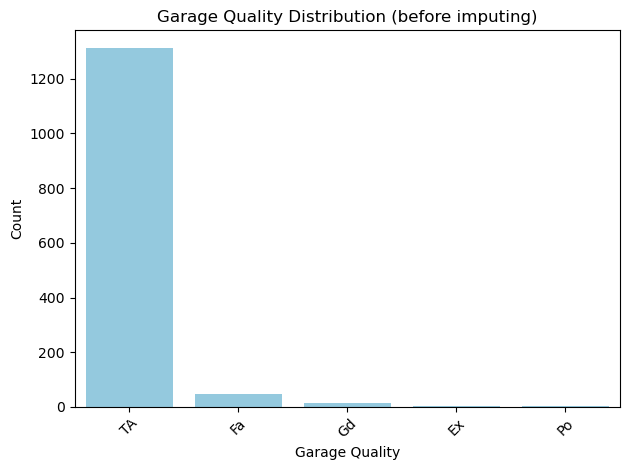

In [6]:
sns.barplot(data=garage_counts, x='GarageQual', y='Count', color='skyblue')
plt.title('Garage Quality Distribution (before imputing)')
plt.xlabel('Garage Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Imputing missing values using "Missing" 

In [8]:
df['GarageQual'].fillna('Missing', inplace=True)

#### Bar Plot after imputing missing values

In [9]:
garage_counts = df['GarageQual'].value_counts().reset_index()
garage_counts.columns = ['GarageQual', 'Count']
garage_counts

,GarageQual,Count
0,TA,1311
1,Missing,81
2,Fa,48
3,Gd,14
4,Ex,3
5,Po,3


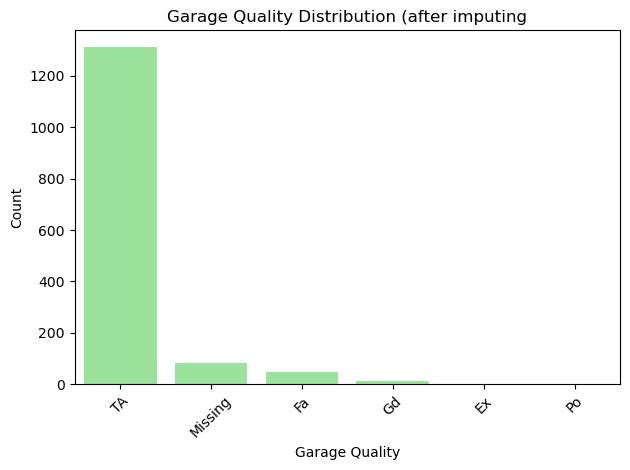

In [10]:
sns.barplot(data=garage_counts, x='GarageQual', y='Count', color='lightgreen')
plt.title('Garage Quality Distribution (after imputing')
plt.xlabel('Garage Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Using Scikit-Learn

### Train Test split

In [11]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 2), (292, 2), (1168,), (292,))

### Simple Imputer

In [14]:
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [15]:
transformer = ColumnTransformer(
    transformers=[
        ('Imputer', imputer, ['GarageQual'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=True,
    verbose=True
)

In [16]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

[ColumnTransformer] ....... (1 of 2) Processing Imputer, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [17]:
X_train

array([['TA', nan],
       ['TA', 'TA'],
       ['Missing', nan],
       ...,
       ['TA', nan],
       ['TA', 'Gd'],
       ['TA', 'TA']], dtype=object)

In [18]:
transformer.named_transformers_['Imputer'].statistics_

array(['Missing'], dtype=object)